In [1]:
import pandas as pd
df2= pd.read_csv("C:\\Users\\keesi\\Beauty_R1.csv")
df2

,Unnamed: 0,h,reviewerID,asin,overall,summary,year,month,day,reviewTime
0,0,42.857143,A1YJEY40YUW4SE,7806397051,1,Don't waste your moneyVery oily and creamy. No...,2014,1,30,2014-01-30
1,1,50.000000,A60XNB876KYML,7806397051,3,OK Palette!This palette was a decent price and...,2014,4,18,2014-04-18
2,2,0.000000,A3G6XNM240RMWA,7806397051,4,great qualityThe texture of this concealer pal...,2013,9,6,2013-09-06
3,3,50.000000,A1PQFP6SAJ6D80,7806397051,2,Do not work on my faceI really can't tell what...,2013,12,8,2013-12-08
4,4,0.000000,A38FVHZTNQ271F,7806397051,3,It's okay.It was a little smaller than I expec...,2013,10,19,2013-10-19
...,...,...,...,...,...,...,...,...,...,...
198497,198497,0.000000,A2BLFCOPSMBOZ9,B00LLPT4HI,5,A little dab...Just a little dab of this shea ...,2014,7,16,2014-07-16
198498,198498,0.000000,A1UQBFCERIP7VJ,B00LLPT4HI,5,Pure organic raw shea butterThis shea butter i...,2014,7,14,2014-07-14
198499,198499,0.000000,A35Q0RBM3YNQNF,B00LLPT4HI,5,One Pound Organic Grade A Unrefined Shea Butte...,2014,7,16,2014-07-16
198500,198500,0.000000,A3LGT6UZL99IW1,B00LLPT4HI,5,This stuff is amazing!I have very dry elbows a...,2014,7,15,2014-07-15


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
#!pip install -U textblob
from textblob import TextBlob

In [3]:
df2.columns

Index(['Unnamed: 0', 'h', 'reviewerID', 'asin', 'overall', 'summary', 'year',
       'month', 'day', 'reviewTime'],
      dtype='object')

<AxesSubplot:>

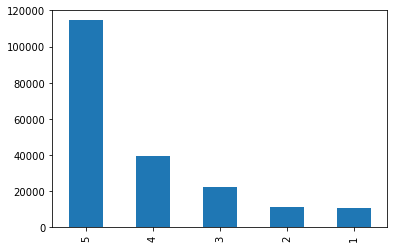

In [4]:
df2['overall'].value_counts().plot(kind='bar')

In [5]:
## Change the reviews type to string
df2['summary'] = df2['summary'].astype(str)
 
## Before lowercasing 
print(df2['summary'][0])
 
## Lowercase all reviews
df2['summary'] = df2['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['summary'][0] ## to see the difference

Don't waste your moneyVery oily and creamy. Not at all what I expected... ordered this to try to highlight and contour and it just looked awful!!! Plus, took FOREVER to arrive.


"don't waste your moneyvery oily and creamy. not at all what i expected... ordered this to try to highlight and contour and it just looked awful!!! plus, took forever to arrive."

In [6]:

## remove punctuation
df2['summary'] = df2['summary'].str.replace('[^\w\s]','')
df2['summary'][0]

<ipython-input-6-9aad7e878161>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['summary'] = df2['summary'].str.replace('[^\w\s]','')


'dont waste your moneyvery oily and creamy not at all what i expected ordered this to try to highlight and contour and it just looked awful plus took forever to arrive'

In [7]:
stop = stopwords.words('english')
df2['summary']=df2['summary'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2['summary'][0]

'dont waste moneyvery oily creamy expected ordered try highlight contour looked awful plus took forever arrive'

In [8]:
#steming
st = PorterStemmer()
df2['summary']=df2['summary'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df2['summary'][0]

'dont wast moneyveri oili creami expect order tri highlight contour look aw plu took forev arriv'

In [10]:
df2.isnull().sum()

Unnamed: 0    0
h             0
reviewerID    0
asin          0
overall       0
summary       0
year          0
month         0
day           0
reviewTime    0
dtype: int64

In [11]:
df = df2.dropna(inplace=False)

In [12]:
df.head(5)

,Unnamed: 0,h,reviewerID,asin,overall,summary,year,month,day,reviewTime
0,0,42.857143,A1YJEY40YUW4SE,7806397051,1,dont wast moneyveri oili creami expect order t...,2014,1,30,2014-01-30
1,1,50.000000,A60XNB876KYML,7806397051,3,ok palettethi palett decent price look differ ...,2014,4,18,2014-04-18
2,2,0.000000,A3G6XNM240RMWA,7806397051,4,great qualityth textur conceal pallet fantast ...,2013,9,6,2013-09-06
3,3,50.000000,A1PQFP6SAJ6D80,7806397051,2,work facei realli cant tell exactli thing powd...,2013,12,8,2013-12-08
4,4,0.000000,A38FVHZTNQ271F,7806397051,3,okayit littl smaller expect okay last long tim...,2013,10,19,2013-10-19


In [32]:
most1 = pd.Series(' '.join(df['summary']).split()).value_counts()[:10]
most1

great      26801
love       18713
good       15233
product    13174
work       11214
hair        9343
nice        7745
best        6297
skin        6103
like        5388
dtype: int64

In [13]:
TextBlob(df['summary'][0]).words

WordList(['dont', 'wast', 'moneyveri', 'oili', 'creami', 'expect', 'order', 'tri', 'highlight', 'contour', 'look', 'aw', 'plu', 'took', 'forev', 'arriv'])

In [14]:
#make wordcoud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

In [15]:
from textblob import TextBlob
statement = "expensive tablet"
sentiment1 = TextBlob(statement).sentiment

In [16]:
sentiment1

Sentiment(polarity=-0.5, subjectivity=0.7)

In [17]:
## Define a function which can be applied to calculate the score for the whole dataset
 
def senti(x):
    return TextBlob(x).sentiment  
 
df2['senti_score'] = df2['summary'].apply(senti)
 
df2.senti_score.head()

0                                    (0.0, 0.0)
1      (0.27777777777777773, 0.611111111111111)
2                     (0.3, 0.5461538461538461)
3      (0.2333333333333333, 0.6666666666666666)
4    (0.27499999999999997, 0.48611111111111116)
Name: senti_score, dtype: object

In [18]:
df2

,Unnamed: 0,h,reviewerID,asin,overall,summary,year,month,day,reviewTime,senti_score
0,0,42.857143,A1YJEY40YUW4SE,7806397051,1,dont wast moneyveri oili creami expect order t...,2014,1,30,2014-01-30,"(0.0, 0.0)"
1,1,50.000000,A60XNB876KYML,7806397051,3,ok palettethi palett decent price look differ ...,2014,4,18,2014-04-18,"(0.27777777777777773, 0.611111111111111)"
2,2,0.000000,A3G6XNM240RMWA,7806397051,4,great qualityth textur conceal pallet fantast ...,2013,9,6,2013-09-06,"(0.3, 0.5461538461538461)"
3,3,50.000000,A1PQFP6SAJ6D80,7806397051,2,work facei realli cant tell exactli thing powd...,2013,12,8,2013-12-08,"(0.2333333333333333, 0.6666666666666666)"
4,4,0.000000,A38FVHZTNQ271F,7806397051,3,okayit littl smaller expect okay last long tim...,2013,10,19,2013-10-19,"(0.27499999999999997, 0.48611111111111116)"
...,...,...,...,...,...,...,...,...,...,...,...
198497,198497,0.000000,A2BLFCOPSMBOZ9,B00LLPT4HI,5,littl dabjust littl dab shea butter need scrap...,2014,7,16,2014-07-16,"(0.3168367346938776, 0.44540816326530613)"
198498,198498,0.000000,A1UQBFCERIP7VJ,B00LLPT4HI,5,pure organ raw shea butterthi shea butter comp...,2014,7,14,2014-07-14,"(0.10731255923563615, 0.446646942800789)"
198499,198499,0.000000,A35Q0RBM3YNQNF,B00LLPT4HI,5,one pound organ grade unrefin shea butterth sk...,2014,7,16,2014-07-16,"(0.08373015873015874, 0.3717063492063491)"
198500,198500,0.000000,A3LGT6UZL99IW1,B00LLPT4HI,5,stuff amazingi dri elbow knee torn tendon left...,2014,7,15,2014-07-15,"(0.21458333333333332, 0.4565586419753086)"


In [19]:
po=pd.DataFrame(df2['senti_score'].tolist(),columns=['Po','Se'])
po

,Po,Se
0,0.000000,0.000000
1,0.277778,0.611111
2,0.300000,0.546154
3,0.233333,0.666667
4,0.275000,0.486111
...,...,...
198497,0.316837,0.445408
198498,0.107313,0.446647
198499,0.083730,0.371706
198500,0.214583,0.456559


In [20]:
df1=pd.concat([po,df2],axis=1)

In [ ]:
#plt.figure(figsize=(8,6))
#for i in range(0,df1.shape[0]):
#    plt.scatter(df1['Po'][i],df1['Se'][i],color='Blue')
#plt.title("Sentiment analysis")
#plt.xlabel('Polarity')
#plt.ylable('Subjectivity')
#plt.show()

In [ ]:
#hf=pd.DataFrame(po["Po"])
#hf.rename(columns = {0:'Pol'}, inplace = True)
#hf

In [ ]:
#df1=pd.concat([hf,df2],axis=1)

In [21]:
df1

,Po,Se,Unnamed: 0,h,reviewerID,asin,overall,summary,year,month,day,reviewTime,senti_score
0,0.000000,0.000000,0,42.857143,A1YJEY40YUW4SE,7806397051,1,dont wast moneyveri oili creami expect order t...,2014,1,30,2014-01-30,"(0.0, 0.0)"
1,0.277778,0.611111,1,50.000000,A60XNB876KYML,7806397051,3,ok palettethi palett decent price look differ ...,2014,4,18,2014-04-18,"(0.27777777777777773, 0.611111111111111)"
2,0.300000,0.546154,2,0.000000,A3G6XNM240RMWA,7806397051,4,great qualityth textur conceal pallet fantast ...,2013,9,6,2013-09-06,"(0.3, 0.5461538461538461)"
3,0.233333,0.666667,3,50.000000,A1PQFP6SAJ6D80,7806397051,2,work facei realli cant tell exactli thing powd...,2013,12,8,2013-12-08,"(0.2333333333333333, 0.6666666666666666)"
4,0.275000,0.486111,4,0.000000,A38FVHZTNQ271F,7806397051,3,okayit littl smaller expect okay last long tim...,2013,10,19,2013-10-19,"(0.27499999999999997, 0.48611111111111116)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198497,0.316837,0.445408,198497,0.000000,A2BLFCOPSMBOZ9,B00LLPT4HI,5,littl dabjust littl dab shea butter need scrap...,2014,7,16,2014-07-16,"(0.3168367346938776, 0.44540816326530613)"
198498,0.107313,0.446647,198498,0.000000,A1UQBFCERIP7VJ,B00LLPT4HI,5,pure organ raw shea butterthi shea butter comp...,2014,7,14,2014-07-14,"(0.10731255923563615, 0.446646942800789)"
198499,0.083730,0.371706,198499,0.000000,A35Q0RBM3YNQNF,B00LLPT4HI,5,one pound organ grade unrefin shea butterth sk...,2014,7,16,2014-07-16,"(0.08373015873015874, 0.3717063492063491)"
198500,0.214583,0.456559,198500,0.000000,A3LGT6UZL99IW1,B00LLPT4HI,5,stuff amazingi dri elbow knee torn tendon left...,2014,7,15,2014-07-15,"(0.21458333333333332, 0.4565586419753086)"


In [22]:
df5=df1[["Po","Se","h","reviewerID","asin","overall","summary","year","month","day","reviewTime"]]
df5

,Po,Se,h,reviewerID,asin,overall,summary,year,month,day,reviewTime
0,0.000000,0.000000,42.857143,A1YJEY40YUW4SE,7806397051,1,dont wast moneyveri oili creami expect order t...,2014,1,30,2014-01-30
1,0.277778,0.611111,50.000000,A60XNB876KYML,7806397051,3,ok palettethi palett decent price look differ ...,2014,4,18,2014-04-18
2,0.300000,0.546154,0.000000,A3G6XNM240RMWA,7806397051,4,great qualityth textur conceal pallet fantast ...,2013,9,6,2013-09-06
3,0.233333,0.666667,50.000000,A1PQFP6SAJ6D80,7806397051,2,work facei realli cant tell exactli thing powd...,2013,12,8,2013-12-08
4,0.275000,0.486111,0.000000,A38FVHZTNQ271F,7806397051,3,okayit littl smaller expect okay last long tim...,2013,10,19,2013-10-19
...,...,...,...,...,...,...,...,...,...,...,...
198497,0.316837,0.445408,0.000000,A2BLFCOPSMBOZ9,B00LLPT4HI,5,littl dabjust littl dab shea butter need scrap...,2014,7,16,2014-07-16
198498,0.107313,0.446647,0.000000,A1UQBFCERIP7VJ,B00LLPT4HI,5,pure organ raw shea butterthi shea butter comp...,2014,7,14,2014-07-14
198499,0.083730,0.371706,0.000000,A35Q0RBM3YNQNF,B00LLPT4HI,5,one pound organ grade unrefin shea butterth sk...,2014,7,16,2014-07-16
198500,0.214583,0.456559,0.000000,A3LGT6UZL99IW1,B00LLPT4HI,5,stuff amazingi dri elbow knee torn tendon left...,2014,7,15,2014-07-15


In [24]:
#df5.to_csv('Rework_Beauty_R1.csv')#storing in csv file

In [23]:
a=df5[df5.overall==3]
a.Po.value_counts()

 0.000000    1034
 0.500000     600
 0.250000     288
 0.300000     271
 0.200000     227
             ... 
 0.160714       1
 0.044231       1
-0.120833       1
 0.569444       1
 0.141042       1
Name: Po, Length: 8459, dtype: int64